In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
plt.rcParams["figure.facecolor"] = "w"
sns.set_style('whitegrid')

#### Иллюстрация про рост

In [5]:
np.random.seed(125)
hh = np.random.normal(loc=170, scale=10, size=100000)

hh_ = np.random.normal(loc=170, scale=10, size=10)
hh_ = np.random.normal(loc=170, scale=10, size=100)

hh_[0] = 165.1
hh_[8] = 151.1

In [6]:
np.mean(hh_)

169.88165517277994

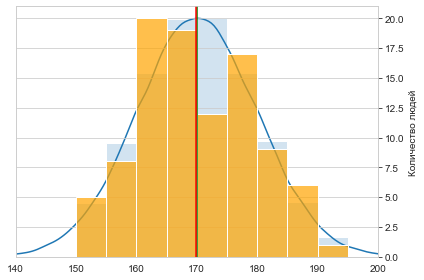

In [7]:
sns.histplot(hh, kde=True, bins=np.arange(150, 200, 5),
             stat='probability', alpha=0.2)

plt.xlim([140, 200])
plt.ylabel('')
plt.grid(None)
plt.yticks([])

plt.twinx()

sns.histplot(hh_, bins=np.arange(150, 200, 5), color='orange', alpha=0.7)

plt.xlabel('Рост людей')
plt.ylabel('Количество людей')
plt.axvline(x=170, color='green')
plt.axvline(x=np.mean(hh_), color='red')
plt.tight_layout()
plt.savefig('hh2.pdf')

#### Наивный бутстрэп

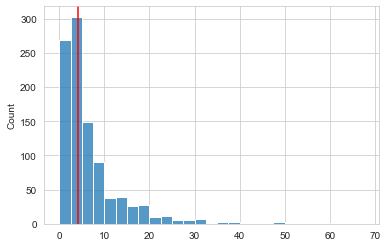

In [8]:
def get_samples(size):
    return np.random.lognormal(mean=1.5, sigma=1.0, size=size)

data = get_samples(size=1000)
sns.histplot(data, bins=np.arange(0, 70, 2.5))
plt.axvline(x=np.median(data), color='red')
plt.show()

In [9]:
medians = []
size = 10000
n_iter = 1000

for _ in range(n_iter):
    samples = get_samples(size=size)
    median = np.median(samples)
    medians.append(median)

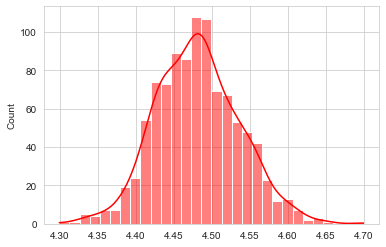

In [10]:
sns.histplot(medians, bins=30, kde=True, color='red', alpha=0.5)
plt.show()

#### Бутстрэп

In [11]:
np.random.seed(797)

In [12]:
size = 10000
data = get_samples(size=size)

In [13]:
medians = []
n_iter = 1000

for _ in range(n_iter):
    samples = np.random.choice(data, size=size, replace=True)
    median = np.median(samples)
    medians.append(median)

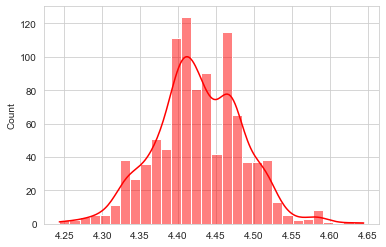

In [14]:
sns.histplot(medians, bins=30, kde=True, color='red', alpha=0.5)
plt.show()

In [15]:
alpha = 0.05
ci = np.quantile(medians, q=[alpha / 2, 1 - alpha / 2])
ci

array([4.31714295, 4.53359519])

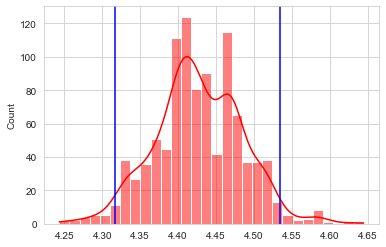

In [16]:
sns.histplot(medians, bins=30, kde=True, color='red', alpha=0.5)
plt.axvline(x=ci[0], color='blue')
plt.axvline(x=ci[1], color='blue')
plt.show()

In [17]:
alpha = 0.05
ci = np.quantile(medians, q=[alpha / 2, 1 - alpha / 2])
ci

array([4.31714295, 4.53359519])

In [18]:
from scipy.stats import bootstrap
bootstrap(
    data=(data,),
    statistic=np.median,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
).confidence_interval

ConfidenceInterval(low=4.306593969778866, high=4.519259967562523)

#### ЦПТ

In [19]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = get_samples(size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

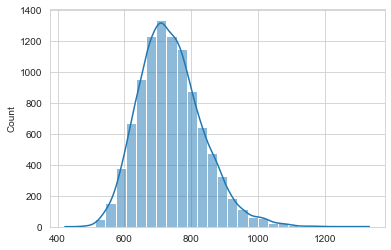

In [20]:
sns.histplot(sums, bins=30, kde=True)
plt.show()

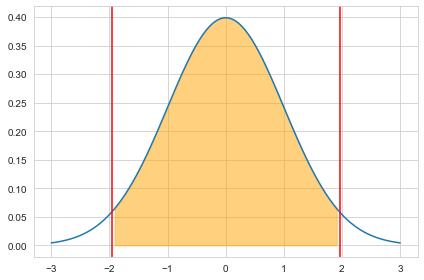

In [21]:
from scipy.stats import norm

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = norm.pdf(x, mu, sigma)

q1 = norm.ppf(0.025, mu, sigma)
q2 = norm.ppf(0.975, mu, sigma)

plt.plot(x, pdf)
mask = (x > q1) & (x < q2)
plt.fill_between(
    x=x[mask],
    y1=pdf[mask],
    y2=0,
    color='orange',
    alpha=0.5
)
plt.axvline(x=q1, color='red', label='q=0.025')
plt.axvline(x=q2, color='red', label='q=0.975')
plt.tight_layout()
plt.savefig('predsk.pdf')
plt.show()

#### Известная дисперсия

In [22]:
from scipy.stats import norm

alpha = 0.05
sigma = 10

mu = np.mean(data)
z_alpha2 = norm.ppf(q=1-alpha/2)
N = len(data)

print(mu - z_alpha2 * sigma / np.sqrt(N), mu + z_alpha2 * sigma / np.sqrt(N))

7.266019868466517 7.658012665374527


#### Примеры новых распределений

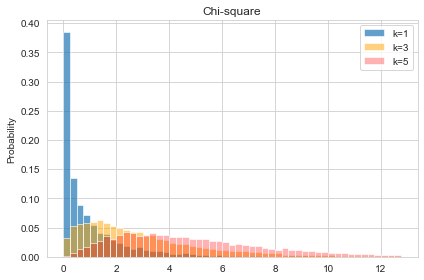

In [21]:
sns.histplot(
    np.random.chisquare(df=1, size=10000),
    stat='probability',
    bins=np.arange(0, 13, 0.25), label='k=1', alpha=0.7)
sns.histplot(
    np.random.chisquare(df=3, size=10000),
    stat='probability',
    bins=np.arange(0, 13, 0.25), label='k=3', color='orange', alpha=0.5
)
sns.histplot(
    np.random.chisquare(df=5, size=10000),
    stat='probability',
    bins=np.arange(0, 13, 0.25), label='k=5', color='red', alpha=0.3
)
plt.legend(loc=1)
plt.title('Chi-square')
plt.tight_layout()
plt.savefig('chisq.pdf')
plt.show()

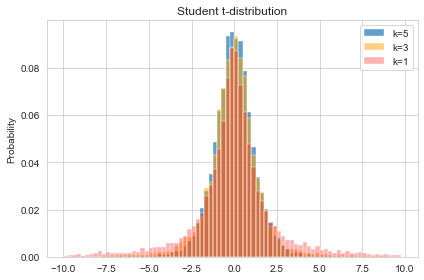

In [22]:
sns.histplot(
    np.random.standard_t(df=5, size=10000),
    stat='probability',
    bins=np.arange(-10, 10, 0.25), label='k=5', alpha=0.7)
sns.histplot(
    np.random.standard_t(df=3, size=10000),
    stat='probability',
    bins=np.arange(-10, 10, 0.25), label='k=3', color='orange', alpha=0.5
)
sns.histplot(
    np.random.standard_t(df=1, size=10000),
    stat='probability',
    bins=np.arange(-10, 10, 0.25), label='k=1', color='red', alpha=0.3
)
plt.legend(loc=1)
plt.title('Student t-distribution')
plt.tight_layout()
plt.savefig('stu.pdf')
plt.show()

#### Неизвестная дисперсия

In [23]:
from scipy.stats import t

alpha = 0.05

mean = np.mean(data)
std = np.std(data)
N = len(data)
t_alpha2 = t.ppf(q=1-alpha/2, df=N-1)

print(mu - t_alpha2 * std / np.sqrt(N), mu + t_alpha2 * std / np.sqrt(N))

7.257359990654003 7.666672543187041


#### Ещё сравнение

In [24]:
alpha = 0.05

mean = np.mean(data)
std = np.std(data)
N = len(data)
z_alpha2 = norm.ppf(q=1-alpha/2)

print(mu - z_alpha2 * std / np.sqrt(N), mu + z_alpha2 * std / np.sqrt(N))

7.257384763953622 7.6666477698874225


In [25]:
bootstrap(
    data=(data,),
    statistic=np.mean,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
).confidence_interval

ConfidenceInterval(low=7.26208027656964, high=7.655310382118658)

#### Доверительный интервал для доли

In [26]:
N = 100
N_pos = 45

alpha = 0.05
p = N_pos / N
sigma = np.sqrt(p * (1 - p))
z_alpha2 = norm.ppf(q=1-alpha/2)

print(p - z_alpha2 * sigma / np.sqrt(N), p + z_alpha2 * sigma / np.sqrt(N))

0.3524930229100607 0.5475069770899393


In [27]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(N_pos, N, alpha=0.05, method='normal')

(0.3524930229100606, 0.5475069770899395)

In [28]:
ci_normal = proportion_confint(N_pos, N, alpha=0.05, method='normal')
ci_normal

(0.3524930229100606, 0.5475069770899395)

In [29]:
ci_wilson = proportion_confint(N_pos, N, alpha=0.05, method='wilson')
ci_wilson

(0.35614537979511973, 0.5475539700255787)

In [30]:
ci_normal[1] - ci_normal[0]

0.19501395417987882

In [31]:
ci_wilson[1] - ci_wilson[0]

0.19140859023045897

#### Библиотеки

In [32]:
# генерация случайных чисел
from numpy import random

# распределения и их статистики
from scipy.stats import norm, t

# бустрэп
from scipy.stats import bootstrap

# доверительный интервал для доли
from statsmodels.stats.proportion import proportion_confint